In [2]:
# Convolutional Neural Network (odd tomatoes vs rotten tomatoes)

# Building the CNN

#Importing Libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense
from keras import backend as K
import numpy as np
from keras.preprocessing import image
from keras import optimizers

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#loading data

image_width=150
image_height=150

train_data_dir='odd_vs_rotten/tomatoes_data/train'
validation_data_dir='odd_vs_rotten/tomatoes_data/validation'
test_data_dir='odd_vs_rotten/tomatoes_data/test'

train_sample=100
validation_sample=30
test_sample=10

epochs=50
batch_size=12
test_size=30



In [4]:
if K.image_data_format() == 'channels_first':
    input_shape= (3,image_width,image_height)
else :
    input_shape= (image_width,image_height,3)

In [5]:
# Data Augmentation

train_datagen= ImageDataGenerator(rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  rescale=1./255,
                                  horizontal_flip=True,
                                 fill_mode='nearest');

validation_datagen= ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [45]:
train_genarator= train_datagen.flow_from_directory(train_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


validation_genarator= train_datagen.flow_from_directory(validation_data_dir,target_size=(image_width,image_height),batch_size=batch_size,class_mode='binary')


test_genarator= train_datagen.flow_from_directory(test_data_dir,target_size=(image_width,image_height),batch_size=test_size,class_mode='binary')

Found 200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


In [7]:
#build model

# Initialising the CNN

model = Sequential()

In [9]:
# Convolution
model.add(Conv2D(32,(3,3),input_shape=input_shape))
# Activation Function
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
# Adding a second convolutional layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


# Adding a third convolutional layer
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
# Flattening
model.add(Flatten())

In [12]:
# Full connection
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

In [13]:
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)       

In [16]:
# Compiling the CNN
model.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [17]:
# Fitting the CNN to the images

print('starting training....')

model.fit_generator(train_genarator,steps_per_epoch=train_sample,
                    epochs=epochs,validation_data=validation_genarator,validation_steps=validation_sample)

starting training....

Epoch 1/50
100/100 [==============================] - 23s 228ms/step - loss: 0.6248 - accuracy: 0.6701 - val_loss: 0.7757 - val_accuracy: 0.6611
Epoch 2/50
100/100 [==============================] - 25s 253ms/step - loss: 0.5467 - accuracy: 0.7406 - val_loss: 0.7305 - val_accuracy: 0.7444
Epoch 3/50
100/100 [==============================] - 25s 253ms/step - loss: 0.4976 - accuracy: 0.7568 - val_loss: 0.2820 - val_accuracy: 0.7306
Epoch 4/50
100/100 [==============================] - 25s 254ms/step - loss: 0.4924 - accuracy: 0.7934 - val_loss: 0.6243 - val_accuracy: 0.6750
Epoch 5/50
100/100 [==============================] - 27s 271ms/step - loss: 0.4605 - accuracy: 0.7975 - val_loss: 0.2504 - val_accuracy: 0.7528
Epoch 6/50
100/100 [==============================] - 26s 261ms/step - loss: 0.4443 - accuracy: 0.8095 - val_loss: 1.0229 - val_accuracy: 0.6972
Epoch 7/50
100/100 [==============================] - 27s 265ms/step - loss: 0.4373 - accuracy: 0.8072 - va

In [18]:
print('training finished!!')

training finished!!


In [46]:
#testing model
test_imgs,test_labels =next(test_genarator)

In [47]:
prediction = model.predict_generator(test_genarator,steps=1)

In [48]:
def round_of_predictions(prediction):
    for i in range(0,30):
        if prediction[i]<=0.5 :
            prediction[i]=0
        else :
            prediction[i]=1

In [49]:
round_of_predictions(prediction)

In [50]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [51]:
cn=confusion_matrix(test_labels,prediction)

Confusion matrix, without normalization
[[14  1]
 [ 2 13]]


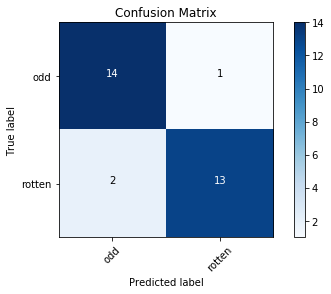

In [52]:
cn_plot_labels=['odd','rotten']
plot_confusion_matrix(cn,cn_plot_labels,title='Confusion Matrix')

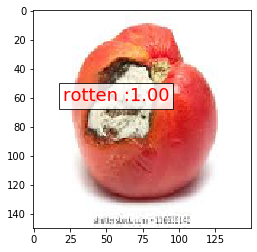

In [56]:
#Prediction of Single image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('odd_vs_rotten/tomatoes_data/test/rotten/images (2).jpg',target_size=(150,150))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='rotten :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))
else:
    value ='odd :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='white',alpha=0.8))

plt.imshow(img1)
plt.show()

In [57]:
#Prediction of Single image

img_pre=image.load_img('odd_vs_rotten/tomatoes_data/test/odd/images (55).jpg',target_size=(150,150))
img_pre=image.img_to_array(img_pre)
img_pre=np.expand_dims(img_pre,axis=0)

In [58]:
result=model.predict(img_pre)
print(result)

[[0.]]


In [59]:
if result[0][0]==0:
    print("odd")
else :
    print("rotten")

odd


In [60]:
##Save model to json
import os
from keras.models import model_from_json

clssf = model.to_json()
with open("OddOrRotten.json", "w") as json_file:
    json_file.write(clssf)
model.save_weights("OddOrRotten.h5")
print("model saved to disk....")

model saved to disk....
